In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import plotly.graph_objects as go

In [2]:
def andronov_hopf(t, x, alpha=1):
  """
  A normal form consisting a Andronov-Hopf bifurcation

  Parameters:
  -----------
  t : float
    The time step that is not very relevant for the actual
    vector field
  x : 2-tuple of floats
    The values in the two dimensions respectively
  alpha : float
    Model parameter which creates the bifurcation

  Returns:
  -----------
  x1_dot : ndarray
    The vector field with respect to x1
  x2_dot : ndarray
    The vector field with respect to x2
  """
  x1, x2 = x
  x1_dot = alpha * x1 - x2 - x1 * (x1**2 + x2**2)
  x2_dot = x1 + alpha * x2 - x2 * (x1**2 + x2**2)
  return x1_dot, x2_dot

In [3]:
def draw_flow(fun, ax, x, alpha, title, color='C0'):
  """
  Drawing the phase portrait of a vector field depending
  on a parameter value.

  Parameters:
  -----------
  fun : callable
    The model that should be evaluated
  ax : Axes object
    The plotting environment where the vector field
    should be visualized
  x : 2-tuple of lists
    Two ranges of intervalls for which the vector field
    should be visualized
  alpha : float
    The model parameter
  title : string
    The title of the plot
  color : string or 3-tuple of floats
    Specifying the color of the phase portrait 

  Returns:
  -----------
  """
  x1, x2 = x
  x1_dot, x2_dot = andronov_hopf(1, (x1, x2), alpha)
  ax.streamplot(x1, x2, x1_dot, x2_dot, color=color)
  ax.set(xlabel='x1',ylabel='x2')
  ax.set_title(title)

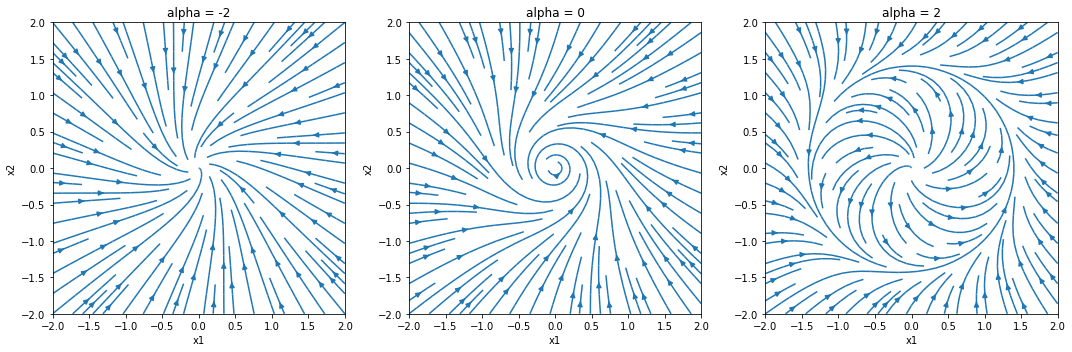

In [4]:
x1, x2 = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
fig = plt.figure(figsize=(15,5))

""" Plotting the required model with 3 values of the parameter """
alphas = [-2, 0, 2]
for index, alpha in enumerate(alphas):
  ax = fig.add_subplot(1, len(alphas), index + 1)
  draw_flow(andronov_hopf, ax, (x1, x2), alpha, f'alpha = {alpha}')
  
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



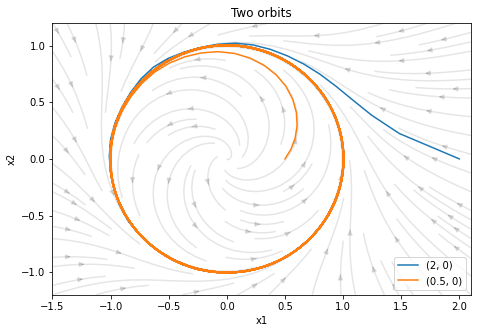

In [5]:
fig=plt.figure(figsize=(7.5, 5))

t_0, t_end = 0, 150
t=np.linspace(t_0, t_end, 1000)

""" 
Plotting two orbits of the model for the 
parameter alpha being 1
"""
start_points = [(2, 0), (.5, 0)]
for point in start_points:
  trajectory = solve_ivp(andronov_hopf, t_span=(t.min(), t.max()), y0=point, t_eval=t)
  ax=fig.add_subplot()
  ax.plot(trajectory.y[0], trajectory.y[1])

# additionally add the phase portrait to see that the orbits indeed follow
# the limit circle
x1, x2 = np.meshgrid(np.linspace(-1.5, 2.1, 20), np.linspace(-1.2, 1.2, 20))
draw_flow(andronov_hopf, ax, (x1, x2), 1, "Two orbits", (0,0,0,.1))
ax.legend(start_points)

# Plotting the bifurcation surface of a normal form

In [6]:
def cusp_bifur(x, alph1, alph2):
  """ 
  A cusp bifurcation model in its normal form

  Parameters:
  -----------
  x : float
    For the 1D case
  alph1 : float
    One model parameter
  alph2 : float
    A second model parameter

  Returns:
  -----------
  """
  return alph1 + alph2 * x - x**3

In [7]:
A1, A2, X = [], [], []
for alph1 in np.linspace(-2, 2, 71):
  for alph2 in np.linspace(-2, 2, 71):
    for start in np.linspace(-3, 3, 11):
      """
      Finding the roots and hence the bifurcation surface of the model
      """
      roots = fsolve(cusp_bifur, x0=[start], args=(alph1, alph2), full_output=True)
      if roots[-2] == 1:
        A1.append(alph1)
        A2.append(alph2)
        X.append(roots[0][0])

In [8]:
# Plot a 3D plot with the parameter values on the bottom plane
fig = go.Figure(data=[go.Scatter3d(x=A1, y=A2, z=X,
                                   mode='markers', marker=dict(color=X, colorscale='Viridis'))])
fig.update_layout(scene = dict(
                    xaxis_title='alpha_1',
                    yaxis_title='alpha2',
                    zaxis_title='x'))
fig.show()